# Lane Finding Pipeline

In [1]:
import numpy as np
import cv2
import segment_image as seg
from ipm import inverse_perspective_mapping
import matplotlib.pyplot as plt
import find_lane_lines as lanelines
#from find_lane_lines import find_window_centroids
#from find_lane_lines import plot_window_centroids
import glob

%matplotlib inline

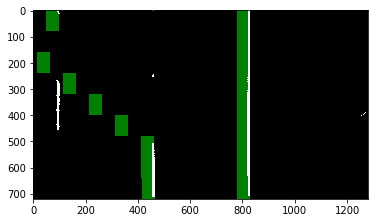

In [2]:
window_width = 50
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

# Read in an image
img = cv2.imread('test_images/straight_lines2.jpg')

# Transform to inverse perspective mapping
ipm_img = inverse_perspective_mapping(img)

# Segmentation pipeline
seg_img = seg.segmentation_pipeline(ipm_img)

# Find lanes
window_centroids = lanelines.find_window_centroids(seg_img, window_width, window_height, margin)

output = lanelines.plot_window_centroids(seg_img, window_centroids, window_width, window_height)

plt.imshow(output)



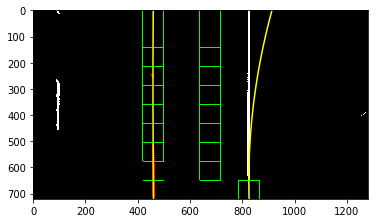

In [3]:
left_fit, right_fit, left_idx, right_idx, nzx, nzy, rect_corners = lanelines.find_lane_fit(seg_img)

lanelines.plot_lane_fit(seg_img, left_fit, right_fit, left_idx, right_idx, nzx, nzy, rect_corners)

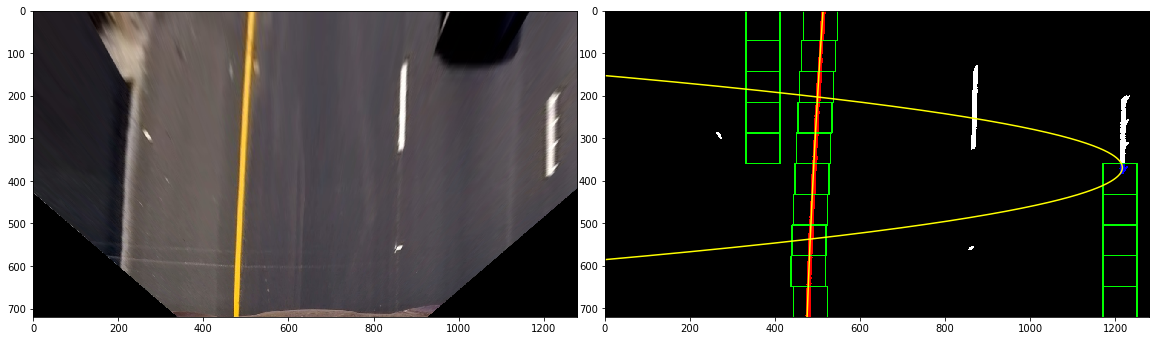

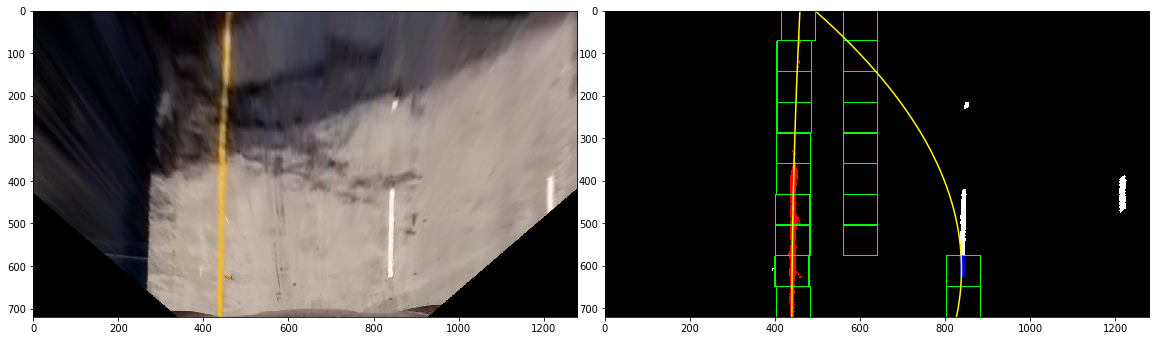

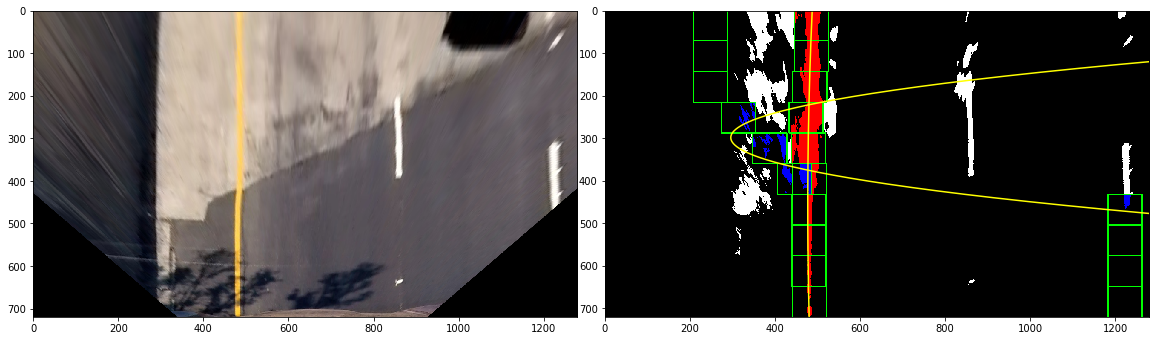

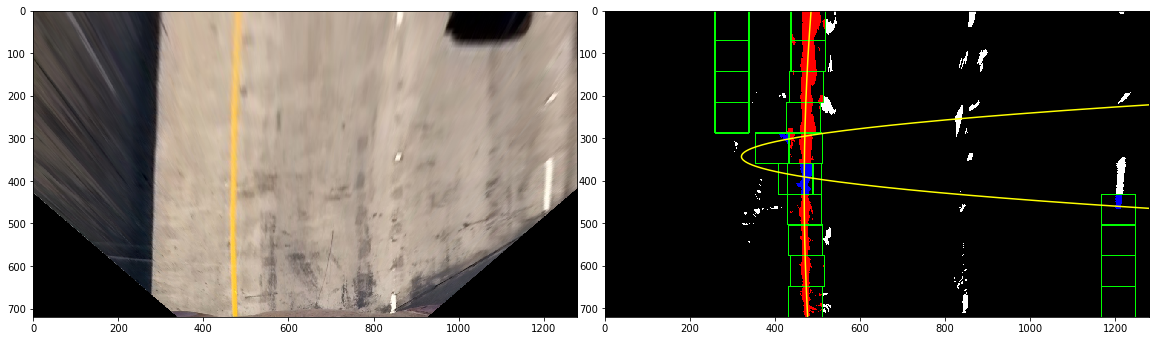

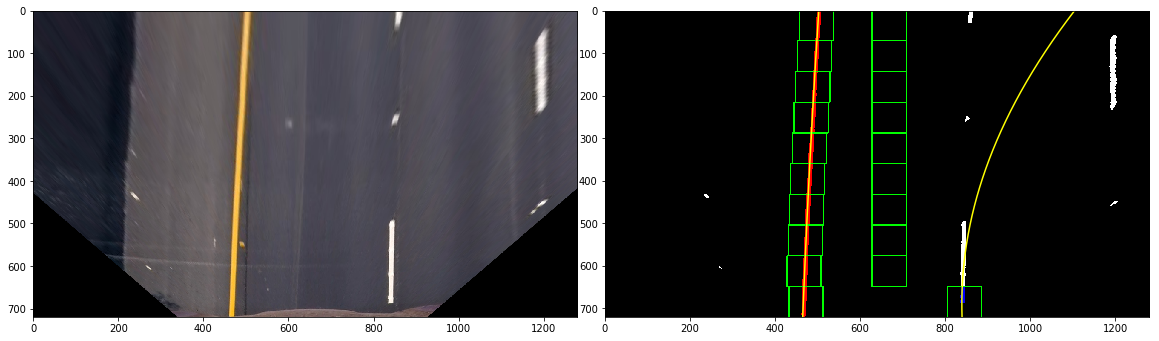

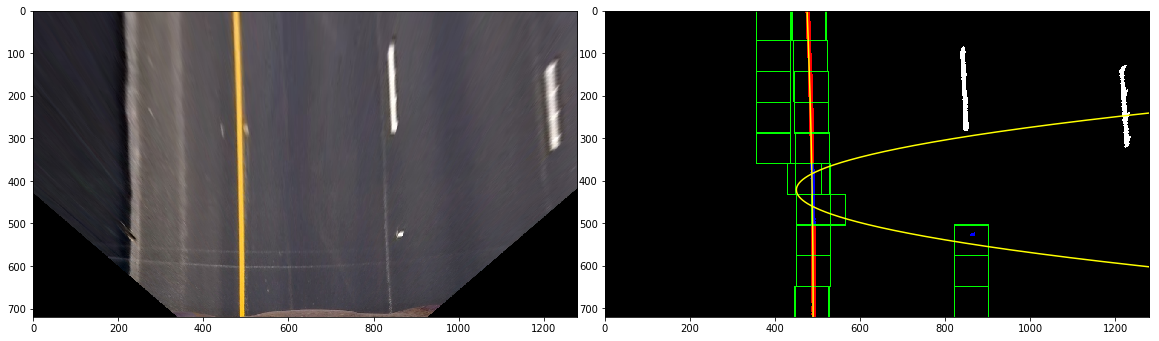

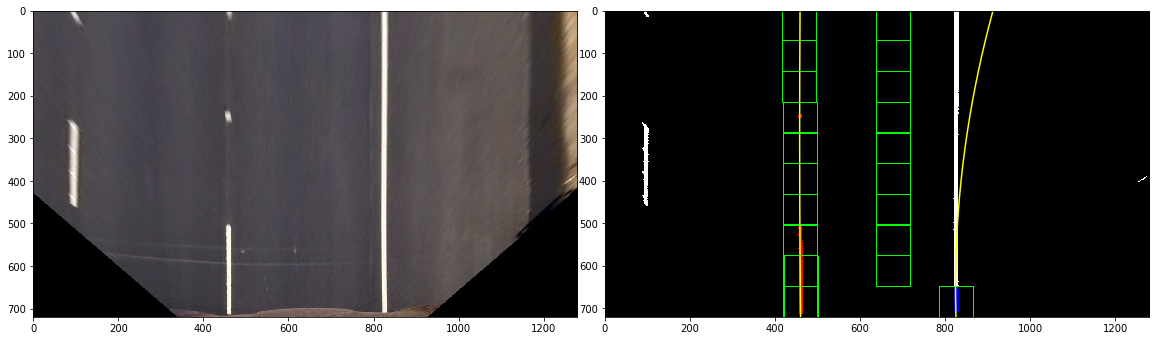

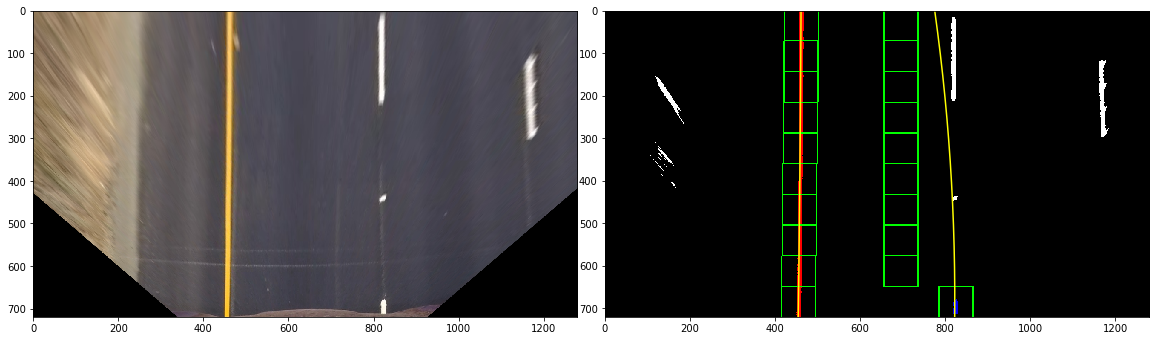

In [5]:
dir_name = 'test_images/'
items = glob.glob('./test_images/*.jpg')

for image_name in items:
    
    # Read image
    img = cv2.imread(image_name)
    
    # Warp image
    ipm_img = inverse_perspective_mapping(img)
    
    # Segment lane lines
    seg_img = seg.segmentation_pipeline(ipm_img)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    
    ax1.imshow(cv2.cvtColor(ipm_img, cv2.COLOR_BGR2RGB))
    
    left_fit, right_fit, left_idx, right_idx, nzx, nzy, rect_corners = lanelines.find_lane_fit(seg_img)

    lanelines.plot_lane_fit(seg_img, left_fit, right_fit, left_idx,  right_idx, nzx, nzy, rect_corners)
